In [1]:
%tensorflow_version 2.x
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early = EarlyStopping(monitor='val_loss', patience=6, verbose=1)
lr_decay = ReduceLROnPlateau(monitor='val_loss', 
                             patience=3, verbose=1, 
                             factor=0.5, min_lr=1e-4)
%matplotlib inline


print("Tesorflow Version:", tf.__version__)
print("Keras Version:",keras.__version__)

TensorFlow 2.x selected.
Tesorflow Version: 2.1.0-rc1
Keras Version: 2.2.4-tf


In [0]:
#!wget https://www.dropbox.com/s/drwy7fq5svwv78p/101_ObjectCategories_split.tar
!tar xf 101_ObjectCategories_split.tar

In [0]:
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import vgg19

In [11]:
train_processing = kimage.ImageDataGenerator(rotation_range=30, brightness_range=[0.2,1.0],
    preprocessing_function=vgg19.preprocess_input)
train_generator = train_processing.flow_from_directory('101_ObjectCategories_split/train', 
                                                       target_size=(224,224), 
                                                       batch_size=300,
                                                       seed=1, 
                                                       shuffle=True)


test_processing = kimage.ImageDataGenerator(
    preprocessing_function=vgg19.preprocess_input)
test_generator = test_processing.flow_from_directory('101_ObjectCategories_split/test', 
                                                     target_size=(224,224), 
                                                     batch_size=100,
                                                     seed=1, 
                                                     shuffle=True)

Found 4600 images belonging to 102 classes.
Found 4544 images belonging to 102 classes.


In [0]:
model = vgg19.VGG19(include_top=False, weights='imagenet', 
                    pooling='avg', input_shape = (224, 224, 3))

In [0]:
for layer in model.layers:
  layer.trainable = False

x = Dense(1024, activation='relu')(model.output)
x = Dense(512, activation='relu')(x)
pred = Dense(102, activation='softmax')(x)

net = Model(model.input, pred)
net.compile(loss='categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=['accuracy']) 

In [17]:
len(model.layers)

23

In [14]:
net.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [15]:
history = net.fit_generator(train_generator, 
                            epochs=20, 
                            validation_data=test_generator,
                            validation_steps=10,
                            callbacks=[lr_decay, early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 10 steps
Epoch 1/20
16/16 [==============================] - 67s 4s/step - loss: 2.7217 - accuracy: 0.4707 - val_loss: 1.2289 - val_accuracy: 0.7060
Epoch 2/20
16/16 [==============================] - 67s 4s/step - loss: 0.7954 - accuracy: 0.7943 - val_loss: 0.8027 - val_accuracy: 0.8180
Epoch 3/20
16/16 [==============================] - 67s 4s/step - loss: 0.4412 - accuracy: 0.8713 - val_loss: 1.0424 - val_accuracy: 0.8010
Epoch 4/20
16/16 [==============================] - 66s 4s/step - loss: 0.2939 - accuracy: 0.9174 - val_loss: 0.7090 - val_accuracy: 0.8560
Epoch 5/20
16/16 [==============================] - 66s 4s/step - loss: 0.2020 - accuracy: 0.9411 - val_loss: 0.7408 - val_accuracy: 0.8580
Epoch 6/20
16/16 [==============================] - 69s 4s/step - loss: 0.1384 - accuracy: 0.9630 - val_loss: 0.6837 - val_accuracy: 0.8610
Epoch 7/20
16/16 [==============================] - 67s 4s/step - lo

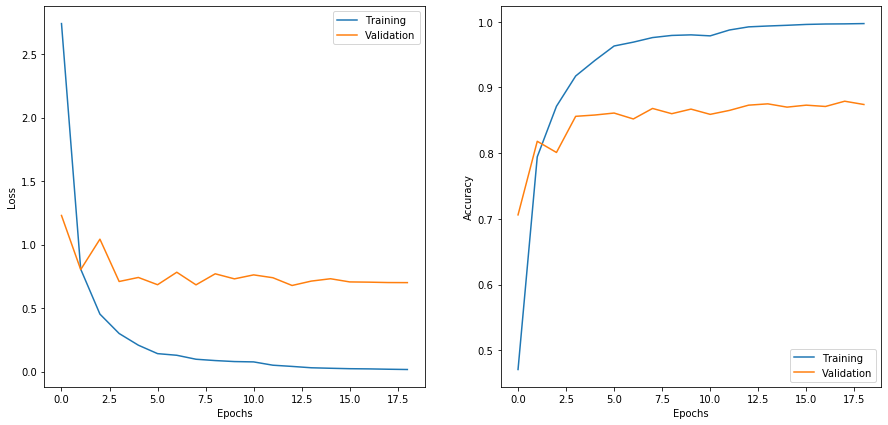

In [16]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training', 'Validation'])

ax2 = plt.subplot(122)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [18]:
net.evaluate(test_generator)

  ...
    to  
  ['...']
46/46 [==============================] - 13s 292ms/step - loss: 0.5795 - accuracy: 0.8926


[0.5794544524472692, 0.89260566]

# 2.

In [21]:
x = GlobalAveragePooling2D()(model.layers[-4].output)

x = Dense(512, activation='relu')(x)
pred = Dense(102, activation='softmax')(x)

net_2 = Model(model.input, pred)
net_2.compile(loss='categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=['accuracy'])
net_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
history = net_2.fit_generator(train_generator, 
                            epochs=50, 
                            validation_data=test_generator,
                            validation_steps=10,
                            callbacks=[lr_decay, early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 10 steps
Epoch 1/50
16/16 [==============================] - 67s 4s/step - loss: 9.2423 - accuracy: 0.2189 - val_loss: 6.3667 - val_accuracy: 0.3810
Epoch 2/50
16/16 [==============================] - 67s 4s/step - loss: 3.3549 - accuracy: 0.4787 - val_loss: 3.4768 - val_accuracy: 0.5290
Epoch 3/50
16/16 [==============================] - 65s 4s/step - loss: 1.9780 - accuracy: 0.6087 - val_loss: 2.3099 - val_accuracy: 0.6270
Epoch 4/50
16/16 [==============================] - 67s 4s/step - loss: 1.2979 - accuracy: 0.7024 - val_loss: 1.6103 - val_accuracy: 0.6720
Epoch 5/50
16/16 [==============================] - 67s 4s/step - loss: 0.9227 - accuracy: 0.7591 - val_loss: 1.4312 - val_accuracy: 0.7260
Epoch 6/50
16/16 [==============================] - 66s 4s/step - loss: 0.7400 - accuracy: 0.8033 - val_loss: 1.3529 - val_accuracy: 0.7480
Epoch 7/50
16/16 [==============================] - 66s 4s/step - lo

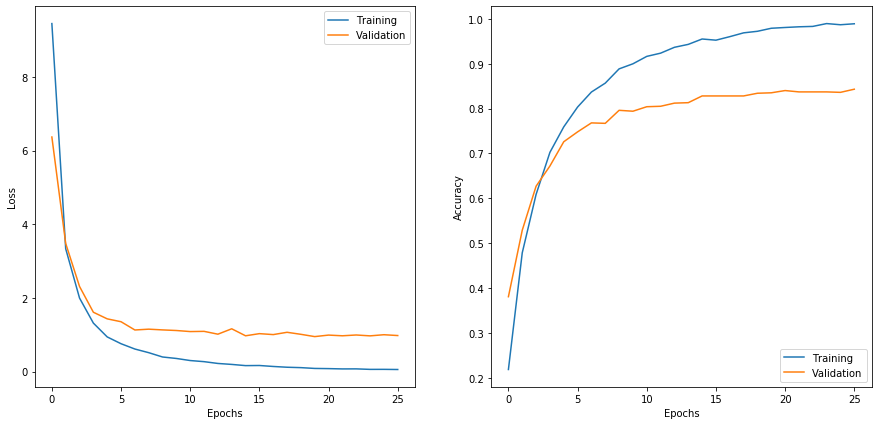

In [23]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training', 'Validation'])

ax2 = plt.subplot(122)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [27]:
net_2.evaluate(test_generator)

  ...
    to  
  ['...']
46/46 [==============================] - 19s 417ms/step - loss: 0.9413 - accuracy: 0.8411


[0.9412651321162349, 0.84110916]

# 3.

In [34]:
x = GlobalAveragePooling2D()(model.layers[-8].output)

x = Dense(512, activation='relu')(x)
pred = Dense(102, activation='softmax')(x)

net_3 = Model(model.input, pred)
net_3.compile(loss='categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(0.005), 
            metrics=['accuracy'])
net_3.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [35]:
history = net_3.fit_generator(train_generator, 
                            epochs=50, 
                            validation_data=test_generator,
                            validation_steps=10,
                            callbacks=[lr_decay, early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 10 steps
Epoch 1/50
16/16 [==============================] - 64s 4s/step - loss: 211.3776 - accuracy: 0.0530 - val_loss: 88.4676 - val_accuracy: 0.1110
Epoch 2/50
16/16 [==============================] - 65s 4s/step - loss: 17.8942 - accuracy: 0.0880 - val_loss: 4.6090 - val_accuracy: 0.0250
Epoch 3/50
16/16 [==============================] - 64s 4s/step - loss: 4.5805 - accuracy: 0.0724 - val_loss: 4.6418 - val_accuracy: 0.0840
Epoch 4/50
16/16 [==============================] - 64s 4s/step - loss: 4.5053 - accuracy: 0.0880 - val_loss: 4.3689 - val_accuracy: 0.0850
Epoch 5/50
16/16 [==============================] - 64s 4s/step - loss: 4.2541 - accuracy: 0.1528 - val_loss: 4.0612 - val_accuracy: 0.1780
Epoch 6/50
16/16 [==============================] - 64s 4s/step - loss: 3.9409 - accuracy: 0.1800 - val_loss: 3.8911 - val_accuracy: 0.1800
Epoch 7/50
16/16 [==============================] - 64s 4s/step 

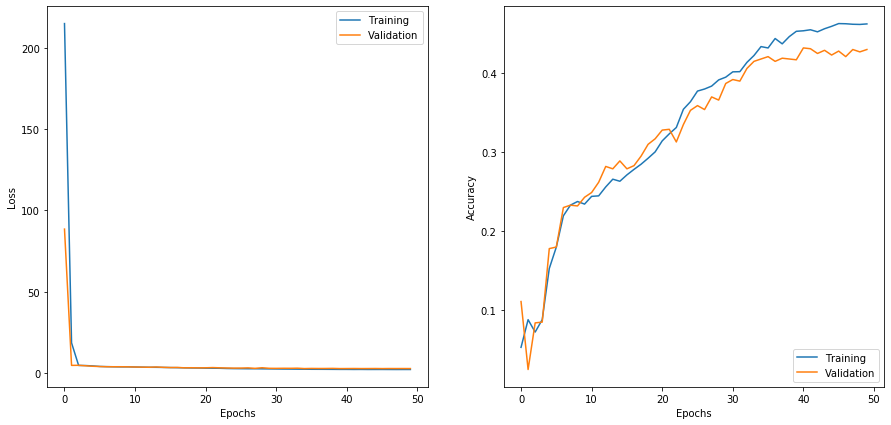

In [36]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(121)
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training', 'Validation'])

ax2 = plt.subplot(122)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [0]:
net_3.evaluate(test_generator)